In [4]:
import sys
import csv
import tweepy
import matplotlib.pyplot as plt

from collections import Counter
from aylienapiclient import textapi

What subject do you want to analyze for this example? 
humalog
How many Tweets do you want to analyze? 
100
--- Gathered Tweets 

--- Opened a CSV file to store the results of your sentiment analysis... 

Analyzed Tweet 1
Analyzed Tweet 2
Analyzed Tweet 3
Analyzed Tweet 4
Analyzed Tweet 5
Analyzed Tweet 6
Analyzed Tweet 7
Analyzed Tweet 8
Analyzed Tweet 9
Analyzed Tweet 10
Analyzed Tweet 11
Analyzed Tweet 12
Analyzed Tweet 13
Analyzed Tweet 14
Analyzed Tweet 15
Analyzed Tweet 16
Analyzed Tweet 17
Analyzed Tweet 18
Analyzed Tweet 19
Analyzed Tweet 20
Analyzed Tweet 21
Analyzed Tweet 22
Analyzed Tweet 23
Analyzed Tweet 24
Analyzed Tweet 25
Analyzed Tweet 26
Analyzed Tweet 27
Analyzed Tweet 28
Analyzed Tweet 29
Analyzed Tweet 30
Analyzed Tweet 31
Analyzed Tweet 32
Analyzed Tweet 33
Analyzed Tweet 34
Analyzed Tweet 35
Analyzed Tweet 36
Analyzed Tweet 37
Analyzed Tweet 38
Analyzed Tweet 39
Analyzed Tweet 40
Analyzed Tweet 41
Analyzed Tweet 42
Analyzed Tweet 43
Analyzed Tweet 44
Analyzed Twe

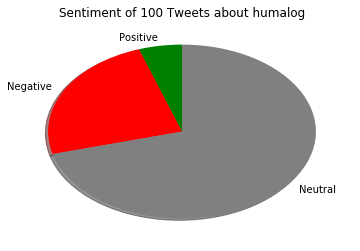

In [5]:
if sys.version_info[0] < 3:
   input = raw_input

## Twitter credentials
consumer_key = "XfcbXSUkdUBxbKZFRI0iwzFta"
consumer_secret = "JM9FM9kYfpiGkCpfw0vaeUjNoY9VKO1lCBHgFx3gJE83DQ3DB0"
access_token = "1031510125784121344-PyoDNc5LJVhpI4q0yiOeG7WprrnAQJ"
access_token_secret = "mcvN9YOdGZDdPt4DwO8ZUo5AA8iAXx0D4DHTOPdxURQ1Q"

## AYLIEN credentials
application_id = "81bbf620"
application_key = "634aaf12bd30e4b0582926ebb7dad519"

## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## set up an instance of the AYLIEN Text API
client = textapi.Client(application_id, application_key)

## search Twitter for something that interests you
query = input("What subject do you want to analyze for this example? \n")
number = input("How many Tweets do you want to analyze? \n")

results = api.search(
   lang="en",
   q=query + " -rt",
   count=number,
   result_type="recent"
)

print("--- Gathered Tweets \n")

## open a csv file to store the Tweets and their sentiment 
file_name = 'C:/Users/prateek1.gupta/Desktop/LifeSciences/Sentiment_Analysis_of_{}_Tweets_About_{}.csv'.format(number, query)

with open(file_name, 'w', newline='') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["Tweet", "Sentiment"]
   )
   csv_writer.writeheader()

   print("--- Opened a CSV file to store the results of your sentiment analysis... \n")

## tidy up the Tweets and send each to the AYLIEN Text API
   for c, result in enumerate(results, start=1):
       tweet = result.text
       tidy_tweet = tweet.strip().encode('ascii', 'ignore')

       if len(tweet) == 0:
           print('Empty Tweet')
           continue

       response = client.Sentiment({'text': tidy_tweet})
       csv_writer.writerow({
           'Tweet': response['text'],
           'Sentiment': response['polarity']
       })

       print("Analyzed Tweet {}".format(c))

## count the data in the Sentiment column of the CSV file 
with open(file_name, 'r') as data:
   counter = Counter()
   for row in csv.DictReader(data):
       counter[row['Sentiment']] += 1

   positive = counter['positive']
   negative = counter['negative']
   neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()